In [1]:
import numpy as np
import pandas as pd
import datetime
import matplotlib.pyplot as plt
import ipywidgets as widgets
import scipy.stats as scs
import scipy.optimize as sco
import statsmodels.api as sm
import scipy.interpolate as sci
from pandas_datareader import data as pdr
import yfinance as yf

In [ ]:
#Importing data 

In [26]:
start_date = datetime.datetime(2010,1,4)
end_date = datetime.datetime(2020,1,4)
sym = ["RICK","AVAV", "RACE","PM","LVS","CGC"]

yf.pdr_override()

In [27]:
data = pdr.get_data_yahoo(sym, start=start_date, end=end_date)
data["Adj Close"].iloc[np.r_[0:3, -3:0]]

[*********************100%***********************]  6 of 6 completed


,AVAV,CGC,LVS,PM,RACE,RICK
Date,,,,,,
2010-01-04,29.610001,NaN,11.084208,30.519670,NaN,8.870609
2010-01-05,29.000000,NaN,12.184628,30.253746,NaN,9.083891
2010-01-06,28.590000,NaN,12.071250,30.253746,NaN,9.054806
2019-12-31,61.740002,21.090000,67.689629,83.591347,164.380569,20.453224
2020-01-02,62.970001,20.129999,69.415199,83.689590,167.329773,20.393360
2020-01-03,67.309998,19.900000,68.356323,83.532410,165.562241,20.213772


In [ ]:
# Calculate log daily returns

In [29]:
log_daily_return = np.log(data / data.shift(1))
log_daily_return['Adj Close'].iloc[np.r_[0:3, -3:0]]

,AVAV,CGC,LVS,PM,RACE,RICK
Date,,,,,,
2010-01-04,NaN,NaN,NaN,NaN,NaN,NaN
2010-01-05,-0.020816,NaN,0.094654,-0.008751,NaN,0.023759
2010-01-06,-0.014239,NaN,-0.009349,0.000000,NaN,-0.003207
2019-12-31,-0.016704,0.115474,-0.003759,-0.007143,0.001451,0.008819
2020-01-02,0.019726,-0.046588,0.025173,0.001175,0.017782,-0.002931
2020-01-03,0.066650,-0.011491,-0.015372,-0.001880,-0.010619,-0.008845


C:\Users\asger\Anaconda3\lib\site-packages\ipykernel_launcher.py:4: MatplotlibDeprecationWarning: Unrecognized location 'upper night'. Falling back on 'best'; valid locations are
	best
	upper right
	upper left
	lower left
	lower right
	right
	center left
	center right
	lower center
	upper center
	center
This will raise an exception in 3.3.
  after removing the cwd from sys.path.


Text(0, 0.5, 'daily returns')

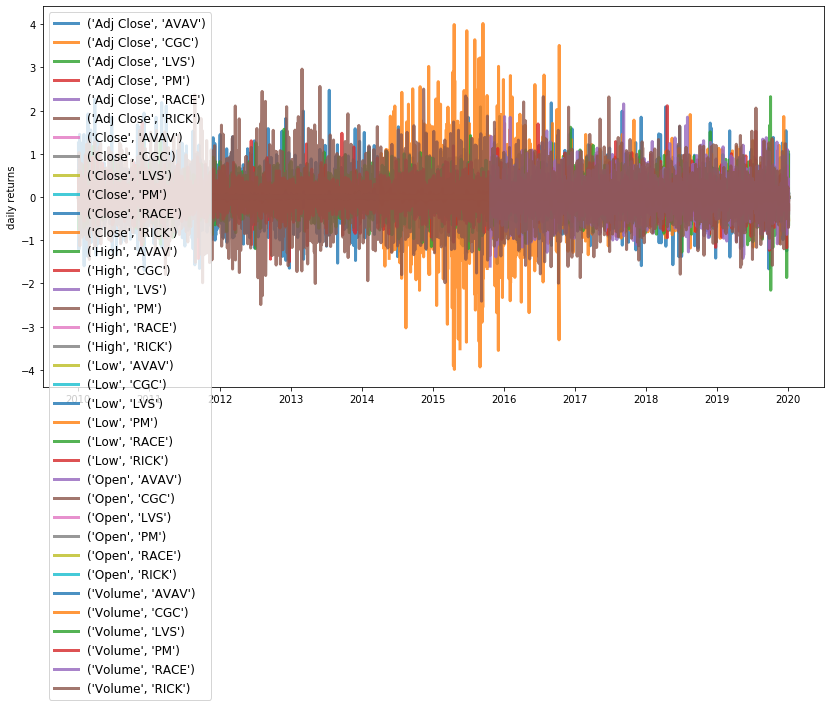

In [31]:
plt.figure(figsize=(14, 7))
for c in log_daily_return.columns.values:
    plt.plot(log_daily_return.index, log_daily_return[c], lw=3, alpha=0.8, label=c)
plt.legend(loc='upper night', fontsize=12)
plt.ylabel('daily returns')